# K-means clustering by Giancarlo Franco Carrillo IRS
Matricula: A01638108
The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd #for data handling
import seaborn as sns #for advanced ploting
import matplotlib.pyplot as plt #for showing plots

# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
irisData = pd.read_csv(url, names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Flower'])
irisData

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
irisData.shape

(150, 5)

2. Drop rows with any missing values

In [4]:
#check for any missing value
print( irisData.isnull().sum() )
#we realize there's no missing value so we don't need to drop any missing value

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Flower         0
dtype: int64


3. Encoding the class label categorical column: from string to num


In [5]:
#Encoding categorical column to analyse the flower types
irisData = irisData.replace({"Flower": {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3} })
irisData

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## #2 Do clustering with the iris flower dataset to form clusters using as features sepal width and length.

4. Discard columns that won't be used


In [7]:
# Select all rows for multiple columns, ["Sepallength", "Sepalwidth","Flower"]
sepalData = irisData.loc[:,["SepalLength", "SepalWidth", "Flower"]]
#get a first look to the data
sepalData.describe()

,SepalLength,SepalWidth,Flower
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,2.000000
std,0.828066,0.435866,0.819232
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.000000
50%,5.800000,3.000000,2.000000
75%,6.400000,3.300000,3.000000
max,7.900000,4.400000,3.000000


5. Scatter plot of the data

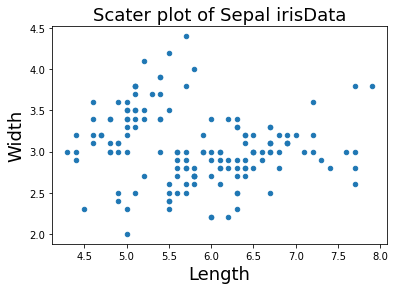

In [9]:
#once filtered the info, we can plot the data
plt.scatter(sepalData.SepalLength,sepalData.SepalWidth, s=20) #s=size of scatters
plt.title('Scater plot of Sepal irisData',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

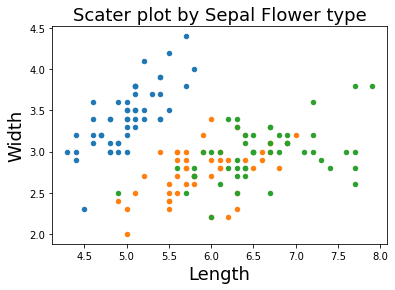

In [11]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = sepalData[sepalData.Flower==1]
df2 = sepalData[sepalData.Flower==2]
df3 = sepalData[sepalData.Flower==3]

plt.scatter(df1.SepalLength,df1.SepalWidth,s=20)
plt.scatter(df2.SepalLength,df2.SepalWidth,s=20)
plt.scatter(df3.SepalLength,df3.SepalWidth,s=20)

plt.title('Scater plot by Sepal Flower type',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [15]:
#import machine learning library
from sklearn.cluster import KMeans

k = 3 #always define this k
#create object to do kmeans and distribute clusters
Km = KMeans(n_clusters=k)

#do kmeans
clusters = Km.fit_predict(sepalData[['SepalLength','SepalWidth']]) #this is formula
#!note distance between points is always the same ecuation = sqrt(dx1^2 + dx2^2 + dx3^2 + ... dxn^2)

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [16]:
#insert one new column to compare clusters vs flower type
sepalData['cluster1'] = clusters
sepalData
#we realize that: flower 1 == cluster 0, flower 2 == cluster 2 and flower 3 == cluster 1 or likewhise but it has more error

,SepalLength,SepalWidth,Flower,cluster1
0,5.1,3.5,1,2
1,4.9,3.0,1,2
2,4.7,3.2,1,2
3,4.6,3.1,1,2
4,5.0,3.6,1,2
...,...,...,...,...
145,6.7,3.0,3,1
146,6.3,2.5,3,0
147,6.5,3.0,3,1
148,6.2,3.4,3,1


In [17]:
sepalData.cluster1.unique()

array([2, 1, 0])

In [18]:
Km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [32]:
Km.inertia_

37.0507021276596

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

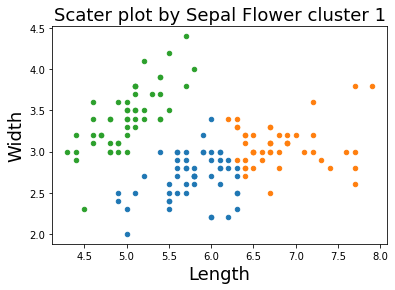

In [19]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = sepalData[sepalData.cluster1==0]
df2 = sepalData[sepalData.cluster1==1]
df3 = sepalData[sepalData.cluster1==2]

plt.scatter(df1.SepalLength,df1.SepalWidth,s=20)
plt.scatter(df2.SepalLength,df2.SepalWidth,s=20)
plt.scatter(df3.SepalLength,df3.SepalWidth,s=20)

plt.title('Scater plot by Sepal Flower cluster 1',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [20]:
#sum of squared distances
sse = []
#k ranges
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(sepalData[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)


C:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

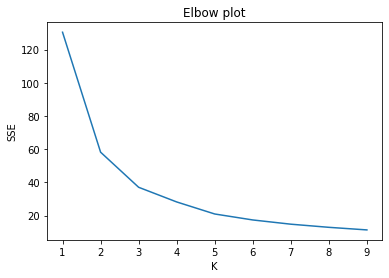

In [21]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
#create object
scaler = MinMaxScaler()

scaler.fit(sepalData[['SepalLength']])
sepalData['SepalLength'] = scaler.transform(sepalData[['SepalLength']])

scaler.fit(sepalData[['SepalWidth']])
sepalData['SepalWidth'] = scaler.transform(sepalData[['SepalWidth']])

sepalData

,SepalLength,SepalWidth,Flower,cluster1
0,0.222222,0.625000,1,2
1,0.166667,0.416667,1,2
2,0.111111,0.500000,1,2
3,0.083333,0.458333,1,2
4,0.194444,0.666667,1,2
...,...,...,...,...
145,0.666667,0.416667,3,1
146,0.555556,0.208333,3,0
147,0.611111,0.416667,3,1
148,0.527778,0.583333,3,1


In [25]:
#get a new data visual
sepalData.describe()

,SepalLength,SepalWidth,Flower,cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,2.000000,0.980000
std,0.230018,0.181611,0.819232,0.831187
min,0.000000,0.000000,1.000000,0.000000
25%,0.222222,0.333333,1.000000,0.000000
50%,0.416667,0.416667,2.000000,1.000000
75%,0.583333,0.541667,3.000000,2.000000
max,1.000000,1.000000,3.000000,2.000000


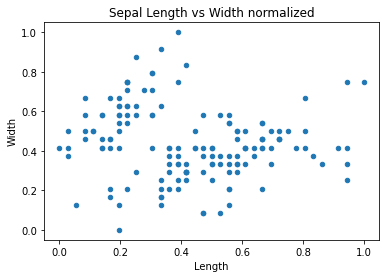

In [27]:
#show scatter plot with the normalized data
plt.scatter(sepalData.SepalLength,sepalData.SepalWidth,s=20)
plt.title('Sepal Length vs Width normalized')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [28]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(sepalData[['SepalLength','SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [29]:
# Add a new column to the dataset with the cluster information
sepalData['cluster2'] = yp

sepalData

,SepalLength,SepalWidth,Flower,cluster1,cluster2
0,0.222222,0.625000,1,2,0
1,0.166667,0.416667,1,2,0
2,0.111111,0.500000,1,2,0
3,0.083333,0.458333,1,2,0
4,0.194444,0.666667,1,2,0
...,...,...,...,...,...
145,0.666667,0.416667,3,1,1
146,0.555556,0.208333,3,0,2
147,0.611111,0.416667,3,1,1
148,0.527778,0.583333,3,1,1


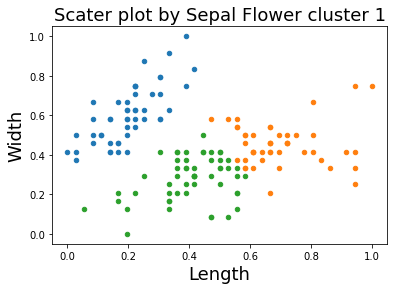

In [30]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = sepalData[sepalData.cluster2==0]
df2 = sepalData[sepalData.cluster2==1]
df3 = sepalData[sepalData.cluster2==2]

plt.scatter(df1.SepalLength,df1.SepalWidth,s=20)
plt.scatter(df2.SepalLength,df2.SepalWidth,s=20)
plt.scatter(df3.SepalLength,df3.SepalWidth,s=20)

plt.title('Scater plot by Sepal Flower cluster 1',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Conclutions: work with the iris dataset


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.
    
    Para estos datos del sepalo, al graficarlos en un inicio, no se logra identificar un patron predeterminado de 3 grupos, tal y como lo sabiamos previamente, incluso al definir y separar los datos acorde a su tipo de flor, nos damos cuenta que estan muy mezclados los datos de las flores 2 y 3, incluso la 1 tiene unos valores lejanos.

4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot
    
    En este caso el normalizar los datos creo que si alcanza a hacer una mejor agrupacion, aunque no se acerca tanto a la real debido a la similitud de caracteristicas, la agrupacion de los clusters es mejor.
    Por otro lado al calcular la k, me atreveria a decir que el sistema nos estuviese indicando que el mejor agrupamiento para estas flores seria en 5 o hasta 4 grupos, con la tercer iteracion aun se alcanza a percibir un decremento muy grande conforme a las siguientes iteraciones, una conclusion a priori, seria que separar estas flores con estos datos, no es lo mas optimo.
